<a href="https://colab.research.google.com/github/AmanPriyanshu/Discussing_Learning/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression:

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. It was used in the biological sciences in early twentieth century. It was then used in many social science applications. Logistic Regression is used when the dependent variable(target) is categorical.

#### Examples:
* To predict whether an email is spam (1) or (0)
* Whether the tumor is malignant (1) or not (0)
* Anomaly Detection

The main aim of Logistic Regression is using the Probability which is enclosed between [0, 1]. We assume anything greater than threshold=0.5 to be predicted to be labelled as a 1 and anything lesser to be labelled as a 0. One of the most essential parts of logistic regression is to map between 0 and 1.

**Model:**
```console
Output = 0 or 1
Hypothesis => Z = WX + B
hΘ(x) = sigmoid (Z)
```
Now what is this sigmoid function?

Before beginning analysing that let us attempt to understand the mapping of X between [0, 1]. To begin, we know that since X is not bound, so is Z. Therefore, Z is unbound leading to Z ∈ [-∞, ∞], therefore -∞ will lead to probability of 0 whereas ∞ will lead to a probability of 1. 

Now, let us begin by mapping [-∞, ∞] to [0, 1]. 

The Sigmoid function,

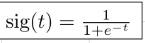

Here, we have replaced Z with t, although the function maps in the same way. We can even replace -∞ and ∞, which results to 0 and 1. Let, us plot the Sigmoid Function:
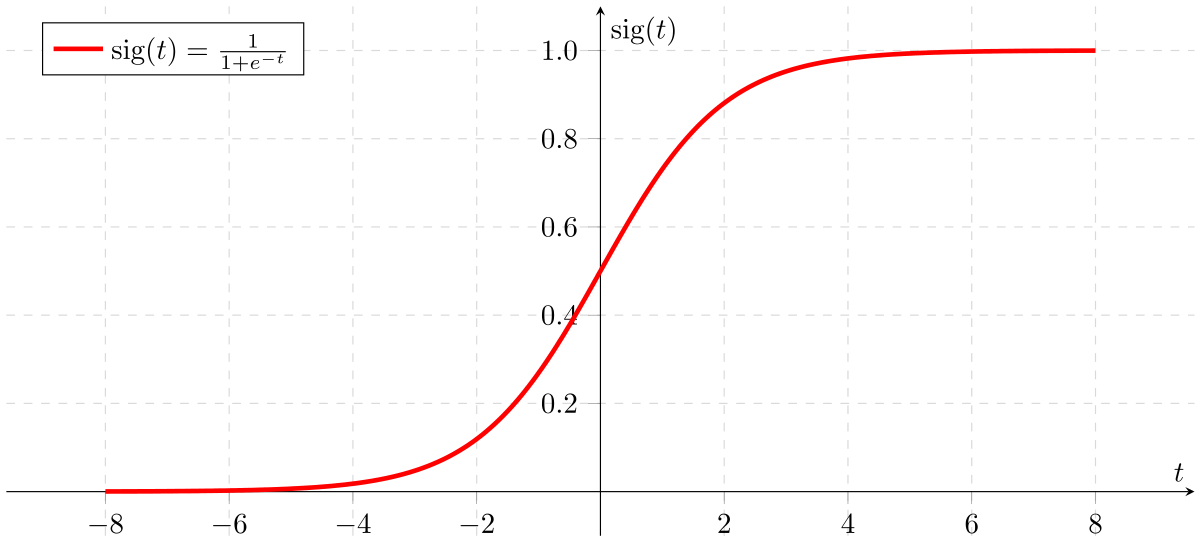

## Decision Boundary:

To predict which class a data belongs, a threshold can be set. Based upon this threshold, the obtained estimated probability is classified into classes.
Say, if predicted_value ≥ 0.5, then classify email as spam else as not spam.
Decision boundary can be linear or non-linear. Polynomial order can be increased to get complex decision boundary.
The most common Decision Boundary is set to 0.5, however we can use non-linear decision boundary as well. But, for this article we will be only looking at Linear Static Decision Boundary such as 0.5; 

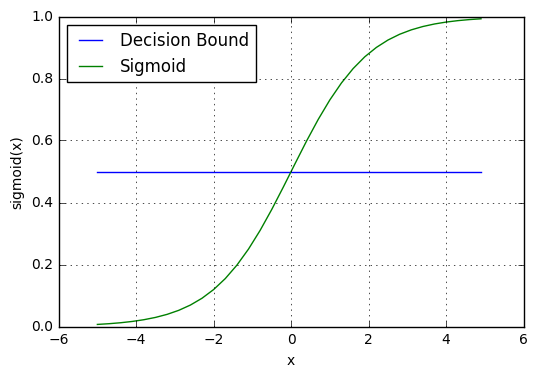

The Decision Boundary allows us to transfer the probability to a Label.

Let us continue with the Cost Function,

## COST FUNCTION:

Linear regression uses mean squared error as its cost function. If this is used for logistic regression, then it will be a non-convex function of parameters (theta). Gradient descent will converge into global minimum only if the function is convex.

Now the most important thing, is that we use a correct mapping to create a convex function. Now, we know that the probability we get is in the form of theta. Now, theta ∈ [0, 1]. 

Now, say the True Label is 1, therefore, theta must be close to 1. Now, we know that the cost function should ideally have global minima, let us make an assumption here, that the function, required is 0 or any Positive Float, leading to the Global Minima at 0. We know that, log(theta) = 0, if theta = 1. And as theta moves towards 0, log(theta) will lead to -∞. So, let us redevelop the cost function to, - log(theta). This leads to a cost of ∞ if theta = 0. Which makes sense, as that is the worst decision to make for the classifier.

What if the True Label is 0?

We know that if theta = 0, our previous cost function will lead to,

Cost Function = - log(theta) = - log(0) = ∞. Which is a poor Cost Function as we require a cost of 0 if theta and the True Label matches each other. So, we will re-map the Cost Function to,

\- log(1 - theta) which leads to 0. On the other hand, if theta = 1, this function will lead to ∞. Therefore, we have two functions, one for the case where: 

* True Label is a 0 where cost function is, - log(1 - theta)
* True Label is a 1 where cost function is, - log(theta)

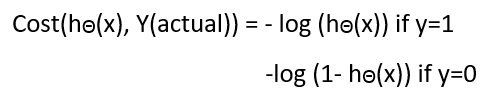

Since we have two functions, let us recreate it to build it as one Function. We have to understand that to recreate it in the fashion that an if-else condition isn't required, we have to use the True Labels as part of the Function. The most important part here, is that we can use the True Label of 0 and 1. We know that if the true label is 0, we apply the cost function, - log(1 - theta) and disreagard the function - log(theta) therefore, what if we say we multiply this part of the cost function with 0, or the true label, i.e.,

cost function = - log(1 - theta) - (Y true) * log(theta)

here we know that when theta = 0, the second part of the function gets disregarded and all that is left is, 

cost function = - log(1 - theta), which is exactly what we wanted. Let us lead on and continue towards checking our function for the true label = 1 or Y true = 1,

cost function = - log(1 - theta) - (1) * log(theta)

which is different form our original aim, here we have to multiply the first part of the function with 0, to recreate and finally get the correct cost function and therefore we multiply it with, (1 - Y true) which will lead to a 0 in the case of the true label being 1 and 1 if the true label = 0, thereby retaining the properties of the if-else function. Here, is the correctly re-developed function,

cost function = - (1 - Y true) * log(1 - theta) - (Y true) * log(theta)

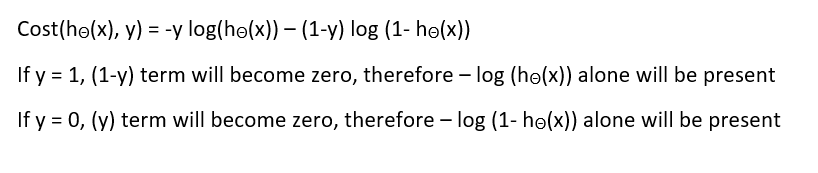

## GRADIENT CALCULARTION:

We know that Gradient Descent or any other optimizer required us to calculate the Gradient or the Derivative of a loss function. Let us derive the Loss Function of the above Logistic Loss, 

Cost Function = (1 - Y true) * log(1 - theta) - (Y true) * log(theta)

So, let us begin calculating the derivative of the function, we know that *Y true* is a constant, therefore, let us find the derivative of log(theta) with respect to theta first, so,

d( log(theta) )/d(theta) = 1/theta,

similarly,

d( (1 -  log(theta)) )/d(theta) = -1/(1 - theta),

take a look here,
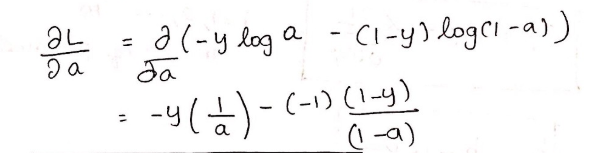

This Leads to,
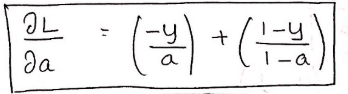

Now, we know that we do not have to calculate the derivative with respect to, the weights. So, first let us re-calculate, d( cost function)/d(weights) using Chain Rule,

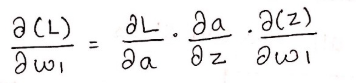

Therefore, we can use,

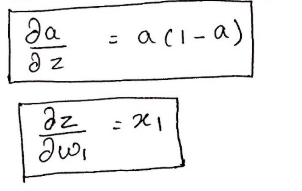

Therefore, we can finally say that d( cost function )/d( weights ) = (theta - Y true) * X1

## EXECUTION:

Now, that we have finally calculated both the Cost Function, the Sigmoid Function and the Gradient. Therefore, we are ready to train a Logistic Function. The ideal method to go about this, is to implement the following Methods,

### 1. INITIALIZATION:
We know, that in general Datasets in the Real World have multiple features. Therefore, we can say that X can be split into X1, X2, X3... Xn. Where, the Data has n-features. Therefore, to calculate Z, we can say there will n different weights/slopes, W1, W2, W3... Wn. On top of that, there is a bias as well, say B.

Z = W1X1 + W2X2 + W3X3 + ... + WnXn + B

We can intialize the weights in different methods, however we will be initializing it using, random_normal_initializer. It is an Initializer that generates tensors with a normal distribution. We can set the, mean and std_dev for this function. We are using,

```console
mean = 0.0, and,
Standard Deviation = 0.05
```
Now, we need to update and find out the most optimal weights and bias values which can give us a good Loss and Accuracy.
### 2. SIGMOID FUNCTION:

We know that, hΘ(x) = sigmoid (Z), 

Sigmoid (Z) = 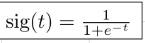

We get a probaility theta which is bound between 0 and 1 and therefore, allows us to Label the predictions correctly. We also have to set the Decision Boundary (here, 0.5). This function simply maps the Z to a probability.

### 3. COST FUNCTION:

cost function = - (1 - Y true) * log(1 - theta) - (Y true) * log(theta)

We simply, implement this function as the Loss/Cost Function.

### 4. GRADIENT:

d( cost function )/d( weight 1 ) = (theta - Y true) * X1
, or,

d( cost function )/d( weights ) = (theta - Y true) * X

We will be using this derivative for Gradient Descent.

### 5. UPDATING WEIGHTS:

W = W - (learning rate) * d( cost function )/d( weights )

### 6. ITERATING:

We then loop between the above steps to update the Weights (W), till they create a very close-fitting line which ideally has a good Accuracy and very low Loss.

```python
def sigmoid(Z):
    theta = 1/(1 + exp(-Z))
    return theta
```

```python
X, Y = load_data()
weights, bias =  random_normal_initializer()
learning_rate = 0.0001
for epoch in range(epochs):
    Z = weights * X + bias
    theta = sigmoid(Z)
    loss = - (1 - Y) * log(1 - theta) - (Y) * log(theta)
    weigths = weigths - learning_rate * (theta - Y) * X
    bias = bias - learning_rate * (theta - Y)

    print("LOSS", mean(loss))
```

The loss will reduce as we iterate through the different epochs leading to a closer and a more perfect Fit.



### 6. OPTIMIZER:
These are important parts of any MACHINE LEARNING Code the optimizer allows us to train faster and better. It allows us to better implement and utilize both a bigger learning rate and a smaller one.

The choice of optimization algorithm for your deep learning model can mean the difference between good results in minutes, hours, and days.

The Adam optimization algorithm is an extension to stochastic gradient descent that has recently seen broader adoption for deep learning applications in computer vision and natural language processing.

Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

Adam was presented by Diederik Kingma from OpenAI and Jimmy Ba from the University of Toronto in their 2015 ICLR paper (poster) titled “Adam: A Method for Stochastic Optimization“. I will quote liberally from their paper in this post, unless stated otherwise.

Adam is different to classical stochastic gradient descent.

Stochastic gradient descent maintains a single learning rate (termed alpha) for all weight updates and the learning rate does not change during training.
A learning rate is maintained for each network weight (parameter) and separately adapted as learning unfolds.

The method computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients.

The authors describe Adam as combining the advantages of two other extensions of stochastic gradient descent. Specifically:

* Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).
* Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).

Adam realizes the benefits of both AdaGrad and RMSProp.
Instead of adapting the parameter learning rates based on the average first moment (the mean) as in RMSProp, Adam also makes use of the average of the second moments of the gradients (the uncentered variance).

Specifically, the algorithm calculates an exponential moving average of the gradient and the squared gradient, and the parameters beta1 and beta2 control the decay rates of these moving averages.

The initial value of the moving averages and beta1 and beta2 values close to 1.0 (recommended) result in a bias of moment estimates towards zero. This bias is overcome by first calculating the biased estimates before then calculating bias-corrected estimates.

#### Adam Configuration Parameters
* alpha: also referred to as the learning rate or step size. The proportion that weights are updated (e.g. 0.001). Larger values (e.g. 0.3) results in faster initial learning before the rate is updated. Smaller values (e.g. 1.0E-5) slow learning right down during training
* beta1. The exponential decay rate for the first moment estimates (e.g. 0.9).
* beta2. The exponential decay rate for the second-moment estimates (e.g. 0.999). This value should be set close to 1.0 on problems with a sparse gradient (e.g. NLP and computer vision problems).
* epsilon. Is a very small number to prevent any division by zero in the implementation (e.g. 10E-8).

In Adam, the paper uses a decay rate alpha = alpha/sqrt(t) updated each epoch (t) for the logistic regression demonstration.

The Adam paper suggests:
* alpha=0.001, 
* beta1=0.9,
* beta2=0.999, 
* epsilon=10−8

Now let us begin by presenting trhe formulae,
Moving averages of gradient and squared gradient.

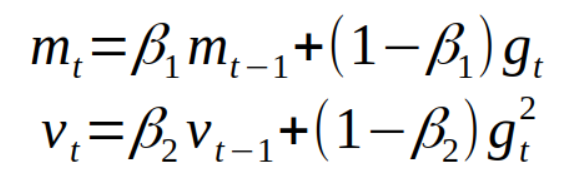

followed by, which is the error correction. Bias corrected estimators for the first and second moments.

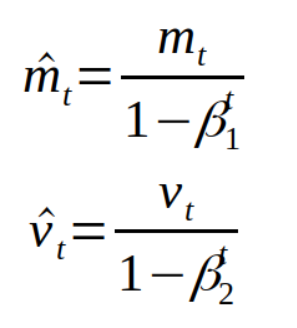

Final Weight update takes place by,

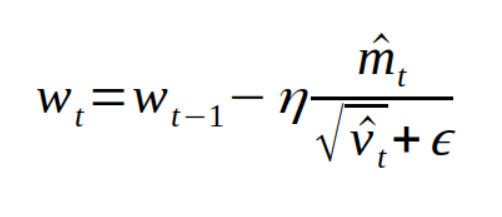

```python
for t in range(num_iterations):
    g = compute_gradient(x, y)
    m = beta_1 * m + (1 - beta_1) * g
    v = beta_2 * v + (1 - beta_2) * np.power(g, 2)
    m_hat = m / (1 - np.power(beta_1, t))
    v_hat = v / (1 - np.power(beta_2, t))
    w = w - step_size * m_hat / (np.sqrt(v_hat) + epsilon)
```

IMPORTANCE OF ADAM:

Properties of Adam, for proof that these are true refer to the paper.
* Actual step size taken by the Adam in each iteration is approximately bounded the step size hyper-parameter. This property add intuitive understanding to previous unintuitive learning rate hyper-parameter.
* Step size of Adam update rule is invariant to the magnitude of the gradient, which helps a lot when going through areas with tiny gradients (such as saddle points or ravines). In these areas SGD struggles to quickly navigate through them.
* Adam was designed to combine the advantages of Adagrad, which works well with sparse gradients, and RMSprop, which works well in on-line settings. Having both of these enables us to use Adam for broader range of tasks. Adam can also be looked at as the combination of RMSprop and SGD with momentum.